## Import Statements

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors

## Load the dataset

In [2]:
df = pd.read_csv("movies_recommendation_data.csv")
df.head()

,Movie ID,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
0,58,The Imitation Game,8.0,1,1,1,0,0,0,0,0
1,8,Ex Machina,7.7,0,1,0,0,0,1,0,0
2,46,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
3,62,Good Will Hunting,8.3,0,1,0,0,0,0,0,0
4,97,Forrest Gump,8.8,0,1,0,0,0,0,0,0


Drama        18
Biography     7
Crime         4
Thriller      3
Comedy        3
Mystery       3
History       3
dtype: int64


/var/folders/qh/zhr4gq8s5px2ff46zwfdk90hy3y30j/T/ipykernel_38318/41738351.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


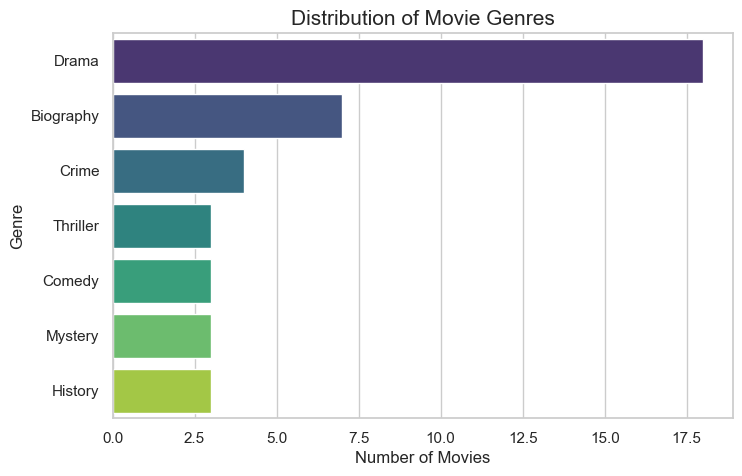

In [ ]:
# Genre Distribution

genre_columns = ['Biography', 'Drama', 'Thriller', 'Comedy', 'Crime', 'Mystery', 'History']

genre_counts = df[genre_columns].sum().sort_values(ascending=False)

print(genre_counts)

# Plot  distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Distribution of Movie Genres", fontsize=15)
plt.xlabel("Number of Movies", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.show()



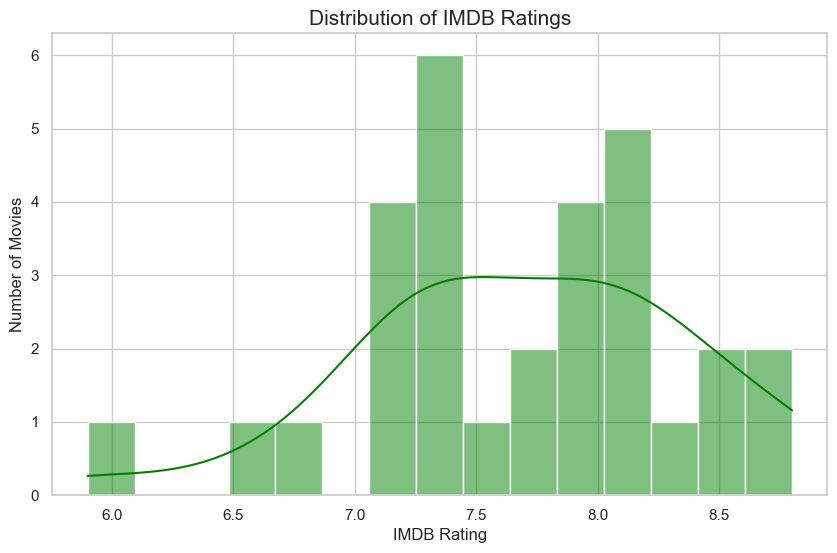

In [ ]:
# IMDB Ratings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB Rating'], bins=15, kde=True, color="green")
plt.title("Distribution of IMDB Ratings", fontsize=15)
plt.xlabel("IMDB Rating", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.show()

#### The recommendation begins by creating the row representation (feature vector), then runs a program to search for the 5 movies most similar

In [ ]:

# Features (exclude Movie ID, Movie Name, and Label)
feature_columns = ['IMDB Rating', 'Biography', 'Drama', 'Thriller', 'Comedy', 'Crime', 'Mystery', 'History']
X_train = df[feature_columns]

#feature vector
new_movie = pd.Series([7.2, 1, 1, 0, 0, 0, 0, 0], index=feature_columns)


KNN = neighbors.NearestNeighbors(n_neighbors=5,n_jobs=-1,algorithm='kd_tree')
KNN.fit(X_train)


# Find the 5 nearest neighbors 
# (reshape to 2D array)
distances, indices = KNN.kneighbors([new_movie])

# Display the nearest movies
print("5 Nearest Neighbors to 'The Post':")
print(df.iloc[indices[0]][['Movie Name', 'IMDB Rating']])



5 Nearest Neighbors to 'The Post':
                Movie Name  IMDB Rating
29          Queen of Katwe          7.4
16          The Wind Rises          7.8
2         A Beautiful Mind          8.2
10  A Brilliant Young Mind          7.2
9           The Karate Kid          7.2


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
